# 1.0 Introduction to Deep Neural Networks. 

This lesson introduces you to the basics of neural network architecture in the form of deep forward networks. This architecture is the quintissential deep neural net architecture. In this lesson you will master the following:

- Why is deep learning important and how it relates to representation, learning and inference.
- How a basic Preceptron works.
- How to apply different types of loss functions. 
- Understand why nonlinear activation is important and why rectified linear units are a good choice.
- How back propagation works, and how you apply the chain rule of calculus to determine gradient. 
- Understand the architectural trade-off between depth and width in deep networks.

The required reading for this lesson is, **Chapter 6: Deep Forward Networks** in GBC. 

## 1.1 Why is deep learning important?

Deep learning methods are a form of **artificial intelligence (AI)** or **machine intelligence**. More sepecifically, deep learning algorithms are a type of **machine learning**. 

What properties does machine intelligene require? There have been many answers to this question over the history of computing. In this case, we will take a practical view, sometimes known as **weak AI**. There are three key properties an intelligent machine must have. Deep learning algorithms are one of a few classes of algorithms that can do the following, essential to machine intelligence:

1. **Representaion:** An intelligent machine must be able to represent a model of the world it interacts with in a general manner. Representation is key to intelligence. Without a good representation the best learning and inference algorithms will struggle. Whereas, good represenation can greatly facilitate learning and inference. In conventional machine learing the representation is model and a set of features. The representation is limited to what the features can provide directly. Deep learning algorithms, on the other hand, learn learn complex representations from raw features. This behavior allows deep learning algorithms to approximate complex relationships. Further, the representations learned often generalize well, up to a point. 
2. **Learning:** As you likely guessed from the very name, deep learning algorithms learn from data. Whereas, conventional machine learning is focused on inference,deep learning algorithms learn both inferencce and representations. As a result, deep leaning algorithms are more complex and therefore harder to train than conventional machine learning algorithms.  
3. **Inference:** Any machine intelligence algorithm must be able to perform inference. The inference is the result produced given new input data. To be useful, the inferences produced by a machine intelligence algorithm must **generalize** beyond the cases used for learning or training. Good generalization requires both good represenations and learning which can deal with the complexity of diverse situations. Some deep learning algorithms can approach human levels of performance in inference tasks such as recognizing objects in images or understanding natural speach. 

The figure below shows a highly abstracted view of machine intelligene, showing the relationship between representation, learning and inferrence. In simple terms, the represenation is learned and then used to make inferences. Errors in the inferences can be used to improve the learning of the representation.   

![](Figures/MachineIntelligence.jpg)


<center>**Figure 1.1**
**Schematic for creating machine intelligence**</center>

**That's it!** The entire rest of this course will focus on just these three points: represenation, learning and inference!

## 2.0 Forward propagtion: The represenation problem

To create useful neutral network we need a **represenation** that has two important properties.   

First, there needs to be a way to represent complex functions of the input. Without this property, nothing is gained, since there are numerious machine learning algorithms that work with simple represenations. We will spend the rest of this section exploring this problem.   

Second, the representation needs to be learnable. Quite obviously, no machine intelligence representaion is useful if there is not a practical algorithm to learn it. We will take up this problem in another section. 

### 2.1 Linear networks

Let's start with the simplest possible network. It has inputs, and an output. The output is a **afine transformation** of the input values. We say this network performs an afine transformation since there is a bias term $b$. 

![Simple Linear Network](Figures/LinearNetwork.jpg)

<center>**Figure 2.1**
**A simple afine network**</center>

This output $y$ of this network is just:

$$y = f(x) = \sum_i w_i \cdot x_i + b$$

This network performs linear regression. Being able to perform only afine transformations, it can't do anything else. 

This represenation is certainly learnable. However, it does not gain us anything over other methods. 

### 2.2 The preceptron

To get started, let's have a look at a simple **preceptron** model. The perceptron was proposed by Rosenblatt (1962). He built on the earlier attempts at a neural network models by McCulloch and Pitts (1943) and Heeb (1949). The perceptron adds **nonliner activation** to the afine network. 

![](Figures/Preceptron.jpg)

<center>**Figure 2.2 Schematic of perceptron with nonlinear activation**</center>

The output $y$ of the perceptron is given by the following:

$$y = f(x) = \sigma \Big( \sum_i w_i \cdot x_i + b \Big)$$

The output of the network is now nonlinear, give the **activation function** $\sigma(x)$. 

But, the preceptron is nothing more than a logistic regression classifier. The fact that the preceptron could only solve linearly seperable problems was pointed out by Minsky and Papert (1969). The failure of the preceptron to learn an **exclusive or (XOR)** function is well known. See for example, Section 6.1 in GBC. 

Again, this represenation is certainly learnable. However, as before, it does not gain us anything over other methods.

### 2.3 Forward networks - We'r gonna need a better representation!

The problem with the simple perceptron is one of represenations. There is no way that this simple network can represent anything but a linearly seperable function. To represent more complex functions, we need a more complex network. 

What we need is a network with layers of **hidden nodes**. The figure below shows a simple example of a neural network with one hidden **hidden layer** with two nodes. Since every node (including inputs) is connected to every other node we call this architecture a **fully connected neural network**.

![](Figures/Hidden.jpg)

<center>**Figure 2.3  
Fully connected neural network with single hidden layer**</center>

Let's walk through some aspects of these diagrams. 

1. The neural network is devided into three layers. The input layer, the hidden layer and the output layer. 
2. The values in the input layer are multiplied by a weight matrix, $W^1$.
3. The nodes in the hidden layer sum their inputs and add a bias term, $b^1$. 
4. The outputs of the hidden layer nodes are multipled by a weight vector, $W^2$.
5. The output layer sums the inputs and adds another bias term, $b^2$.

### 2.4 Neural network architectures - Finding represenations

The representations achievable by neural network with just a single hidden layer  are quite powerful. In fact, Cybenko (1989) showed that such a network with an infinite number of hidden units using sigmodal activation can approximate any arbitrary function. Hornik (1991) generalized this to apply to any activation function. We call this theorm the **universal approximation theorm**.  

A universal approximation theorm may see like a really exciting development; especially if you are a machine intelligence neard. Howevever, one must be circumspect when viewing such a result. A representation with an infinite number of nodes cannot be learned in any practical sense. Still it is comforting to know that, at least in principle, a representation can be learned for arbitrarily complex problems. 

While infinitely wide networks with a single layer are unrealistic, we are not limited to one dimension. In fact, depth is typically more effective at creating complex represenations rather than width in neural networks. Depth is measured by the count of hidden layers stacked one on top of the other in the network. Hence, the term deep neural networks. 

The Figure 2.4 below shows the results of an emperical study by Goodfellow, Shlens and Szegedy (2014) of accruacy of the network vs depth. Notice that accuracy increases rapidly with depth untill about 8 layers, after which the effect is reduced. 

![](Figures/Accuracy-Layers.JPG)

<center>**Figure 2.4 Emperical results of accuracy vs. number of layers**  
Diagram from Goodfellow et. al. 2014</center>

Another view of the emperical study by Goodfellow et. al. is shown in Figure 2.5 below. In this case accuracy verses number of model parameters is compared for three different network architectures. The deeper network (11 layers) makes more  efficient use of the parameters in terms of improved accuracy. The number of parameters in a layer is approximately the total number of parameters divided by the number of layers. Notice that for the particular case tested convolutional neural networks are more efficient than fully-connected networks. We will discuss convolutional neural networks in a subsequent lesson. 

Of particular interest is the fact that the fully-connected network and the shallow convolutional neural network appear to be over-fitting as the test accuracy actually decresses as the number of parameters increses. We will discuss the significant problems of over-fitting in neural networks in a subsequent lesson. 

![](Figures/Accuracy-Parameters.JPG)

<center>**Figure 2.5 Emperical results of accuracy for different network architectures**  
Diagram from Goodfellow et. al. 2014</center>

**Summary:** Deep networks tend to produce better models, with less tendency to overfit, for a given level of complexity. 

### 2.5 Computational graphs

There is another way to look at neural nets, computational graphs. A computational graph breaks down the steps of a complex algorithm into steps. 

Computational graphs provide a way to organize complex compuations in an efficient manner. Widely used compuational frameworks such as Tensor Flow, CNTK, and Torch all use compuational graphs. Organizing computations in a graph allows these platform to minimize memory transfers. In simple terms, the platform can look ahead in the graph and organize data and compuational results so as to minimize memory transfers. As a result, such platforms can be significantly faster than, say, Python Numpy. Systems like Numpy require memory transfer before each operation, which can take more time than the actual computation. 

The diagram below decomposes the single hidden layer neural network discussed in the previous section into a compuational graph. 

![](Figures/CompGraph1.jpg)

<center>**Figure 2.6  
Computional graph for fully connected neural network of Figure 2.3** </center>

### 2.6 Activation functions

A neural net would is just a linear model if only linear units are used. This limits representations to only functions to those with linear coefficients. To create more general representations **nonlinear activation functions** are required. 

In present practice three activation functions are generally used. 

1. The **rectilinear** activation function is used for most hidden units.
2. The **logistic** or **sigmoid** activation function is used for binary classifiers.
3. The **softmax** activation function is used for multi-class classifiers. 

Rectilinear functions are typically used as the activiation function for hidden units in neural networks. The rectilinear function is defined at:

$$f(x) = max(0, x)$$

The rectilinear function is linear for postive responses and zero for responses less than 0.0. Noticec that the derivatives of the rectilinear function are not continious. While this might seem to be a problem, in practice, even gradient-based optimization functions work well with thsi activation function. 

The rectilinear function is plotted in the cell below:

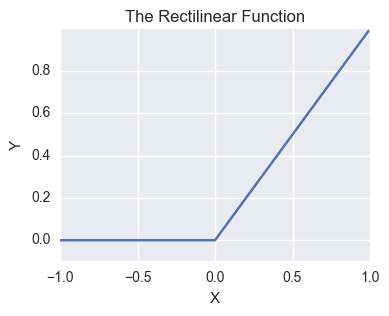

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
## Compute the lectilinear function
x = [float(x)/100 for x in range(-100, 100)]
y = [max(0, y) for y in x]
## Plot the result
def plot_figs(x,y,title, figsize = (4, 3)):
    plt.figure(figsize=figsize).gca() # define axis
    sns.set_style("darkgrid")
    plt.plot(x, y)
    plt.ylim((-0.1,1.0))
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
plot_figs(x,y,'The Rectilinear Function')    

Another widely used activation function is the **logistic** or **sigmoid**. The sigmoid is used as the activation for the output layer of a binary classifier. The general sigmoid function can be written as:

$$\sigma(x) = \frac{L}{1 + e^{-k(x_0-x)}}\\
where\\
L = max\ value\\
k = slope\\
x_0 = sigmoid\ midpoint$$

With $L=1$, $k=1$, and $x_0 = 0$, the logistic function becomes: 

$$\sigma(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$$

The sigmoid function can asymptotically approach $0$ or $1$, but will never reach these extreem values. However, because of the rapid decrease in the derivative away from $0$ the sigmoid can **saturate** when using gradient-based training. For this reason, the sigmoid is typically not used for hidden layers in neural networks.   

When used in a the binary classifier a threshold is set to determine if the result is $0$ or $1$. The threshold can be adjusted to bias the result as desired. 

The code in the cell below plots the sigmoid function. 

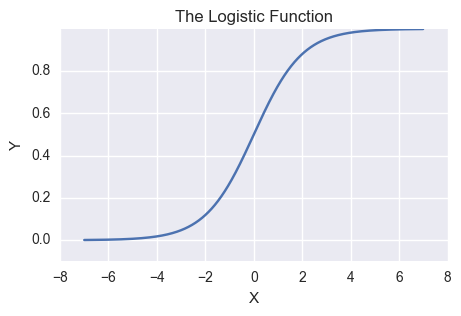

In [2]:
from math import exp
x = [float(x)/100 for x in range(-700, 700)]
y = [exp(y)/(1 + exp(y)) for y in x]
plot_figs(x,y,'The Logistic Function', figsize = (5,3))    

The **softmax** function or **normalized exponential function** is used for the output activation function of a multi-class classifiers. The softmax function is the multinomial generalization of the sigmoid or logistic function. The probability of each class $j$ is writen as: 

$$\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

The normalization $\sum_{k=1}^K e^{z_k}$ ensures the sum of probabilities for all classes add to $1.0$. The class selected by the classifier is the class with the largest value of $\sigma(z_j)$.

## 3.0 Learning in neural networks: Backpropagation

Now that we have a promising represenation, we need to determine if it is trainable. The answer is not only yes we can, but that we can do so in a compuationally efficient maner, using a cleaver algorithm known as **backpropagation**. 

The backpropagation algorithm was developed independently mulitiple times. The earliest work on this algorithm was by Kelly (1960) in the context of control theory and Bryson (1961) in the context of dynamic programming. Rumelhart, Hinton and Williams (1984) demonstrated emperically that backpropagation can be used to train neural networks. Their paper marks the modern history of neural networks, and set off the first wave of enthusiasm. 

The backpropagation algorithm requires several components. First, we need a **loss function** to measure how well our representation matches the function we are trying to learn. Second, we need a way to propagate changes in the represenatuion through the complex network For this we will use the **chain rule of calculus** to compute **gradients** of the represenation. In the general case, this process requires using automatic differentiation methods. Finally, we need a way to update the represenation based on the gradients. In the next sections, we will address each of these. 

## Loss functions

To train a neural network we must have a **loss function**, also known as a **cost function**. In simple terms, the loss function measures the fit of a model to the training data. The lower the loss, the better the fit. 

To train deep learning models **cross entropy** is often used as a loss function. This is an information theoretic measure of model fit. We can understand cross entropy as follows. 

First define **Shannon entropy** as:

$$\mathbb{H}(I) = E[I(X)] = E[-ln_b(P(X))] = - \sum_{i=1}^n P(x_i) ln_b(P(x_i)\\
where\\
E[X] = the\ expectation\ of\ X\\
I(X) = the\ information\ content\ of\ X\\ 
P(X) = probabiliy\ of\ X\\
b = base\ of\ the\ logrithm$$  

This rather abstract formula gives us a way to compute the expecte information content of a set of values $X$. The more likely (higher probability) of $X$ the less informative it is. 

To create a loss function from the definition of Shannon entropy we start with the **Kullback-Leibler divergence (KL divergence)** or **relative entropy**. The KL divergence is an information theortic measure of the difference between two distributions, $P(X)$ and $Q(X)$.

$$\mathbb{D}_{KL}(P|Q) = - \sum_{i=1}^n p(x_i)\ ln_b \frac{q(x_i)}{q(x_i)}$$

Ideally, in the case of training a machine learning model we want a distribution $Q(X)$, which is identical to the actual data distribution $P(X)$. 

But, you may say, if we could know $P(X)$ why compute $Q(X)$ at all? Fortunately, we do not have to. We can rewrite the KL divergence as:

$$\mathbb{D}_{KL}(P|Q) = \sum_{i=1}^n p(x_i)\ ln_b p(x_i) - \sum_{i=1}^n p(x_i)\ ln_b q(x_i)$$

Since $P(X)$ is fixed and we wish to find $Q(X)$ when we train our model, we can minimize the term on the right, which is the **cross entropy** defined as:

$$\mathbb{H}(P,Q) = - \sum_{i=1}^n p(x_i)\ ln_b q(x_i)$$


## Performance Metrics

Now that we have the basic neural network architecture we need a way to evaluate the 

## The Back Propagation Algorithm

The back propagation algorithm is at the core of neural network training.  

### Chain rule of calculus

Key to the back propagation algorithm is the chain rule of calculus; not to be confused with the chain rule of probability. The chain rule allows us to back propagate gradients though an arbitratily complex graph of functions. 

Now, suppose there is a function $y = g(x)$, and another function $z = f(y) = f(g(x))$. How do we compute the derivative of $z$ with respect to $x$? Appling the chain rule we get: 

$$\frac{dz}{dx} = \frac{dz}{dy}\frac{dy}{dx}$$

Consider $x \in R^M$ $g(x) \Rightarrow R^M$ and $ f(y) \Rightarrow z \in R$. The chain rule becomes:

$$\frac{\partial z}{\partial x} = \sum_j \frac{dz}{dy_j}\frac{dy_j}{dx_i}$$

Which we can rewrite as:

$$\nabla_{x}z = \Big( \frac{dx}{dy} \Big)^T \nabla_{y}z$$